In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from itertools import product

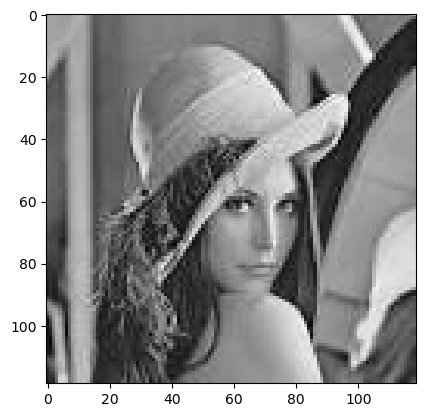

In [2]:
image = cv2.imread("../data/lena.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")
plt.show()

In [21]:
def _median_filtering(window):
    median = np.median(window.reshape(-1))
    return median

def median_filtering(image, kernel_size):
    H, W = image.shape

    h_coords, w_coords = np.indices((H, W))
    h_coords = h_coords.reshape(-1)
    w_coords = w_coords.reshape(-1)
    
    image_padded = cv2.copyMakeBorder(
        image, 
        kernel_size//2, 
        kernel_size//2, 
        kernel_size//2, 
        kernel_size//2, 
        cv2.BORDER_CONSTANT, 
        value=0
    )

    image_convolved = list(map(
        lambda coord: _median_filtering(image_padded[coord[0]:coord[0]+kernel_size, coord[1]:coord[1]+kernel_size]), 
        zip(h_coords, w_coords)
    ))
    image_convolved = np.array(image_convolved, dtype=np.float64).reshape(H, W)

    return image_convolved

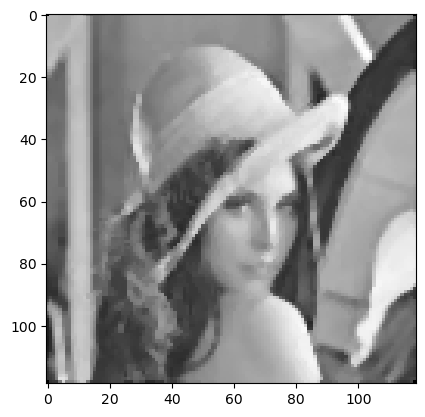

In [22]:
image_convolved = median_filtering(image.astype(np.float64), 3)
plt.imshow(image_convolved, cmap="gray")
plt.show()

In [26]:
def create_gaussian_filter(sigma):
    size = int(2 * np.pi * sigma)
    if size % 2 == 0: size += 1

    coord = np.arange(size) - size//2
    gaussian_density_1d = np.exp(-0.5 * (coord/sigma)**2)

    h_gaussian_density = gaussian_density_1d.reshape(size, 1)
    w_gaussian_density = gaussian_density_1d.reshape(1, size)
    gaussian_density_2d = h_gaussian_density * w_gaussian_density
    gaussian_density_2d /= gaussian_density_2d.sum()
    return gaussian_density_2d

def _bilateral_filtering(window, gaussian_kernel, sigma_color):
    H, W = window.shape

    gaussian_color = np.exp(-0.5 * ((window - window[H//2, W//2])/sigma_color)**2)
    kernel = gaussian_kernel * gaussian_color
    kernel /= kernel.sum()

    return np.sum(window * kernel)

def bilateral_filtering(image, sigma_coord, sigma_color):
    gaussian_kernel = create_gaussian_filter(sigma_coord)
    Hf, Wf = gaussian_kernel.shape

    H, W = image.shape

    h_coords, w_coords = np.indices((H, W))
    h_coords = h_coords.reshape(-1)
    w_coords = w_coords.reshape(-1)

    image_padded = cv2.copyMakeBorder(image, Hf//2, Hf//2, Wf//2, Wf//2, cv2.BORDER_CONSTANT, value=0)

    image_convolved = list(map(
        lambda c: _bilateral_filtering(
            image_padded[c[0]:c[0]+Hf, c[1]:c[1]+Wf],
            gaussian_kernel,
            sigma_color
        ), zip(h_coords, w_coords)
    ))

    image_convolved = np.array(image_convolved, dtype=np.float64).reshape(H, W)
    return image_convolved

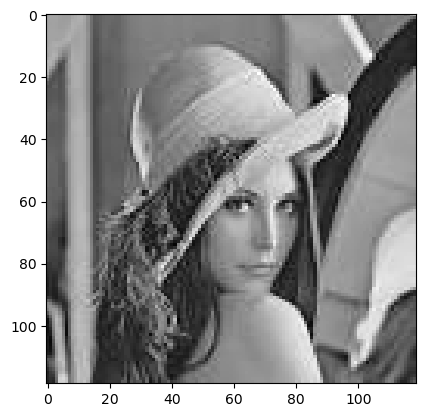

In [27]:
image_convolved = bilateral_filtering(image.astype(np.float64), 1, 1)
plt.imshow(image_convolved, cmap="gray")
plt.show()